In [ ]:
import matplotlib.pyplot as plt
import sys, os
sys.path.append('../')
result_dir = os.path.join(os.path.dirname(os.getcwd()), 'result', 'gnk')
figure_dir = os.path.join(os.path.dirname(os.getcwd()), 'figure')

from src.simulator.gnk import gnk
import torch
import numpy as np
from src.plot import plot_recovery
import seaborn as sns
from src.plot import prepare_data_for_coverage_plot
import matplotlib
from matplotlib.patches import Patch

plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'

## NPE

In [212]:
mlmc_net_1 = torch.load(os.path.join(result_dir, 'gnk_npe_mlmc_n_1000_100.pt'), map_location=torch.device('cpu'))
mlmc_net_2 = torch.load(os.path.join(result_dir, 'gnk_npe_mlmc_n_1000_50.pt'), map_location=torch.device('cpu'))
mlmc_net_3 = torch.load(os.path.join(result_dir, 'gnk_npe_mlmc_n_1000_10.pt'), map_location=torch.device('cpu'))
mc_net_low = torch.load(os.path.join(result_dir, 'gnk_npe_mc_n_1000_low.pt'), map_location=torch.device('cpu'))
mc_net_high = torch.load(os.path.join(result_dir, 'gnk_npe_mc_n_100.pt'), map_location=torch.device('cpu'))

/var/folders/r6/jlzvq0td5mqf05q5jm6fs2vm0000gp/T/ipykernel_50857/196494565.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mlmc_net_1 = torch.load(os.path.join(result_di

In [ ]:
np.random.seed(0)
simulator = gnk()
theta, x = simulator(n = 500, m = 1000)
theta = np.load(os.path.join(result_dir, 'gnk_posterior_theta.npy'))
x = np.load(os.path.join(result_dir, 'gnk_posterior_x.npy'))
t_theta = torch.tensor(theta, dtype=torch.float32)
t_x = torch.tensor(x, dtype=torch.float32)

In [214]:
nlpd_1 = - mlmc_net_1.log_prob_unstandardized(t_theta, t_x).detach().numpy()
nlpd_2 = - mlmc_net_2.log_prob_unstandardized(t_theta, t_x).detach().numpy()
nlpd_3 = - mlmc_net_3.log_prob_unstandardized(t_theta, t_x).detach().numpy()
nlpd_low = - mc_net_low.log_prob_unstandardized(t_theta, t_x).detach().numpy()
nlpd_high = - mc_net_high.log_prob_unstandardized(t_theta, t_x).detach().numpy()

In [ ]:
def box_plot_gnk(metric_list:list, title:str):

    f, ax = plt.subplots(figsize = (3, 3))
    colors = ["#25A986", "#0C0C85", "#850D0C", "#850D0C", "#850D0C"]

    sns.boxplot(metric_list, ax = ax, palette = colors,#  orient='h',
                flierprops={'marker': '.', 'color': 'black', 'markersize': 5, 'markerfacecolor': 'black', 'markeredgecolor': 'black'})
    ax.set_ylabel(title, fontsize = 17)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticklabels(["$n = 10^3$", "$n = 100$", "$n_1 = 10$", "$n_1 = 50$", "$n_1 = 100$"], fontsize = 14, rotation = 90)
    ax.tick_params(axis = 'y', labelsize = 13)

    for patch in ax.patches:
        patch.set_alpha(0.5)
    f.tight_layout()

    ax.set_ylim(-1.0, 0.1)

    return f

/var/folders/r6/jlzvq0td5mqf05q5jm6fs2vm0000gp/T/ipykernel_50857/3170250513.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["$n = 10^3$", "$n = 100$", "$n_1 = 10$", "$n_1 = 50$", "$n_1 = 100$"], fontsize = 14, rotation = 90)


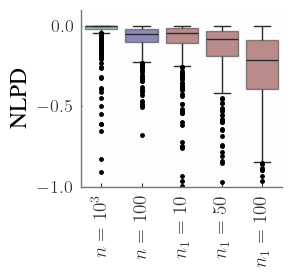

In [221]:
f = box_plot_gnk([nlpd_low, nlpd_high, nlpd_3, nlpd_2, nlpd_1], 'NLPD')

In [222]:
f.savefig(os.path.join(figure_dir, 'gnk_NLPD_NPE.pdf'), bbox_inches = 'tight', dpi = 300)

In [178]:
post_1 = mlmc_net_1.sample_unstandardized(2000, t_x).detach().numpy()
post_2 = mlmc_net_2.sample_unstandardized(2000, t_x).detach().numpy()
post_3 = mlmc_net_3.sample_unstandardized(2000, t_x).detach().numpy()
post_low = mc_net_low.sample_unstandardized(2000, t_x).detach().numpy()
post_high = mc_net_high.sample_unstandardized(2000, t_x).detach().numpy()

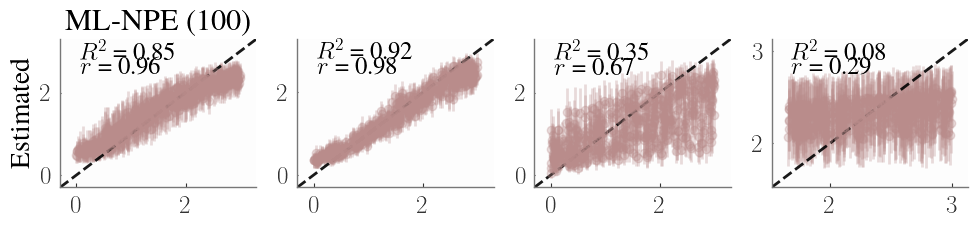

In [187]:
f = plot_recovery(post_1, theta,  color = "#B98C8B", param_names = ["ML-NPE (100)", "", "", ""], add_r2 = True, xlabel = ["", "", "", ""], 
                 fig_size = (10, 2.5), title_fontsize = 22, label_fontsize = 20, metric_fontsize = 18, tick_fontsize = 18)

In [188]:
f.savefig(os.path.join(figure_dir, 'gnk_plot_recovery_mlmc_100.pdf'), bbox_inches = 'tight', dpi = 300)

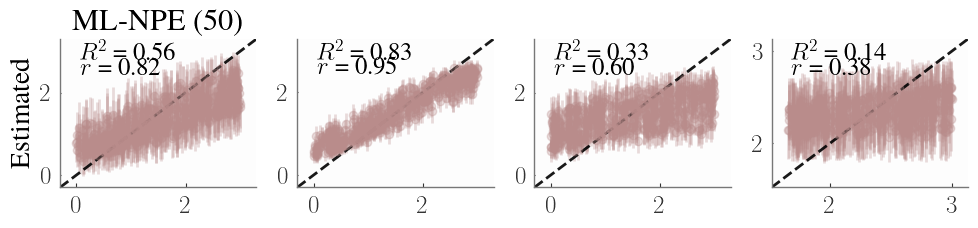

In [163]:
f = plot_recovery(post_2, theta,  color = "#B98C8B", param_names = ["ML-NPE (50)", "", "", ""], add_r2 = True, xlabel = ["", "", "", ""], 
                 fig_size = (10, 2.5), title_fontsize = 22, label_fontsize = 20, metric_fontsize = 18, tick_fontsize = 18)

In [164]:
f.savefig(os.path.join(figure_dir, 'gnk_plot_recovery_mlmc_50.pdf'), bbox_inches = 'tight', dpi = 300)

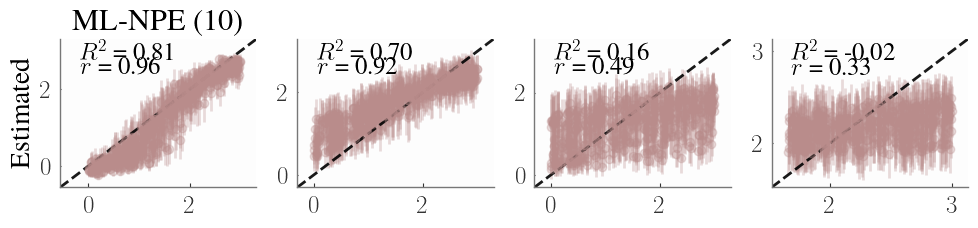

In [161]:
f = plot_recovery(post_3, theta,  color = "#B98C8B", param_names = ["ML-NPE (10)", "", "", ""], add_r2 = True, xlabel = ["", "", "", ""], 
                 fig_size = (10, 2.5), title_fontsize = 22, label_fontsize = 20, metric_fontsize = 18, tick_fontsize = 18)

In [162]:
f.savefig(os.path.join(figure_dir, 'gnk_plot_recovery_mlmc_10.pdf'), bbox_inches = 'tight', dpi = 300)

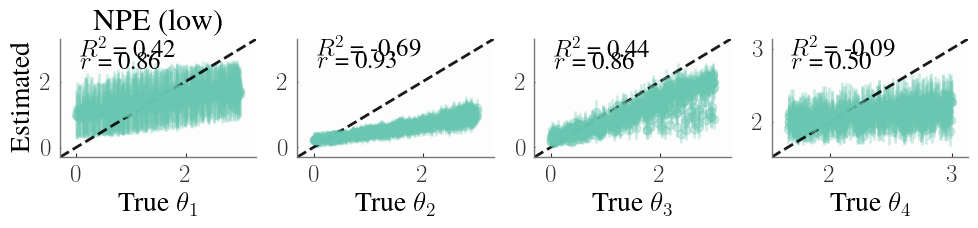

In [185]:
f = plot_recovery(post_low, theta,  color = "#69C6B0", param_names = ["NPE (low)", "", "", ""], add_r2 = True, xlabel = [r"True $\theta_1$", r"True $\theta_2$", r"True $\theta_3$", r"True $\theta_4$"], 
                 fig_size = (10, 2.5), title_fontsize = 22, label_fontsize = 20, metric_fontsize = 18, tick_fontsize = 18)

In [186]:
f.savefig(os.path.join(figure_dir, 'gnk_plot_recovery_mc_low.pdf'), bbox_inches = 'tight', dpi = 300)

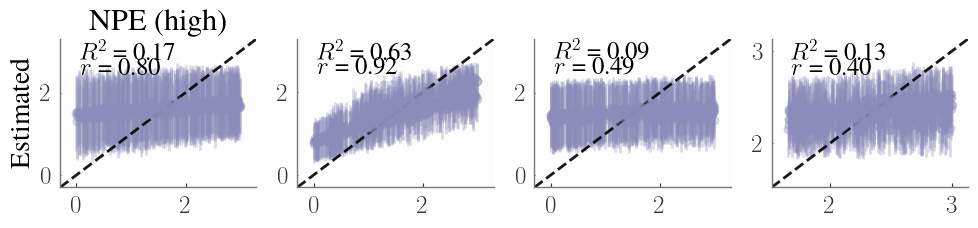

In [218]:
f = plot_recovery(post_high, theta,  color = "#8C8BB9", param_names = ["NPE (high)", "", "", ""], add_r2 = True, xlabel = ["", "", "", ""], 
                 fig_size = (10, 2.5), title_fontsize = 22, label_fontsize = 20, metric_fontsize = 18, tick_fontsize = 18)

In [219]:
f.savefig(os.path.join(figure_dir, 'gnk_plot_recovery_mc_high.pdf'), bbox_inches = 'tight', dpi = 300)

In [208]:
coverage_mlmc, confidence_level = prepare_data_for_coverage_plot(mlmc_net_1, 101, 2000, t_x, t_theta)
coverage_mc_low, confidence_level = prepare_data_for_coverage_plot(mc_net_low, 101, 2000, t_x, t_theta)

In [209]:
coverage_mc_high, confidence_level = prepare_data_for_coverage_plot(mc_net_high, 101, 2000, t_x, t_theta)

In [223]:
np.save(os.path.join(result_dir, 'gnk_coverage_mlmc.npy'), coverage_mlmc)
np.save(os.path.join(result_dir, 'gnk_coverage_mc_low.npy'), coverage_mc_low)
np.save(os.path.join(result_dir, 'gnk_coverage_mc_high.npy'), coverage_mc_high)

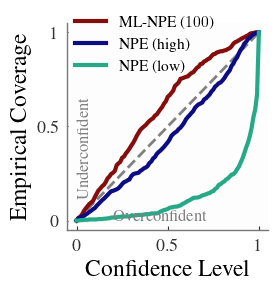

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

colors = ["#850D0C", "#25A986", "#0C0C85"]

ax.set_xticks([0, 0.5, 1])
ax.set_xticklabels(["0", "0.5", "1"], fontsize = 13)
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(["0", "0.5", "1"], fontsize = 13)
ax.plot([0, 1], [0, 1], "--", color="grey", linewidth = 2)
ax.plot(confidence_level, coverage_mlmc, label="ML-NPE ($100$)", linewidth = 3, color = colors[0])
ax.plot(confidence_level, coverage_mc_high, label="NPE (high)", linewidth = 3, color = colors[2])
ax.plot(confidence_level, coverage_mc_low, label="NPE (low)", linewidth = 3, color = colors[1])
fig.legend(fontsize = 11.2, loc='upper left', bbox_to_anchor=(0.24, 1.0), frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.2, 0.0, 'Overconfident', fontsize = 12, color='grey', rotation  = 0)
ax.text(0.0, 0.13, 'Underconfident', fontsize = 12, color='grey', rotation  = 90)

ax.set_ylabel("Empirical Coverage", fontsize = 17)
ax.set_xlabel("Confidence Level",  fontsize = 17)
fig.tight_layout()

In [225]:
fig.savefig(os.path.join(figure_dir, 'gnk_coverage.pdf'), bbox_inches = 'tight', dpi = 300)